<a href="https://colab.research.google.com/github/abdullahsakib/Time-Series/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

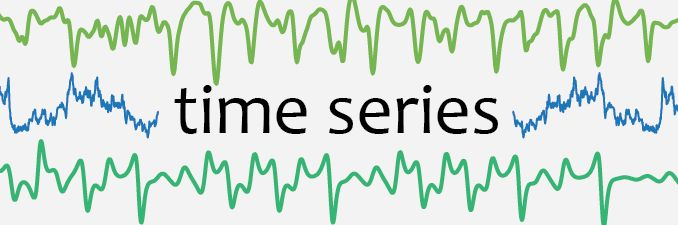

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [132]:
!pip install yfinance


In [133]:
import yfinance as yf

# Define the ticker symbol
ticker = 'TSLA'

# Fetch the data
df = yf.download(ticker, start='2019-01-01', end='2023-12-31')

# Display the data
print(df.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-01-02  20.406668  21.008667  19.920000  20.674667  20.674667  174879000
2019-01-03  20.466667  20.626667  19.825333  20.024000  20.024000  104478000
2019-01-04  20.400000  21.200001  20.181999  21.179333  21.179333  110911500
2019-01-07  21.448000  22.449333  21.183332  22.330667  22.330667  113268000
2019-01-08  22.797333  22.934000  21.801332  22.356667  22.356667  105127500


In [134]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500
...,...,...,...,...,...,...
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400


# **SIMPLE MOVING AVERAGE**

In [135]:
df['Open10']=df['Open'].rolling(window=10, min_periods=1).mean()
df['Open20']=df['Open'].rolling(window=20, min_periods=1).mean()
df['Open30']=df['Open'].rolling(window=30, min_periods=1).mean()
df['Open50']=df['Open'].rolling(window=50, min_periods=1).mean()

<Axes: xlabel='Date'>

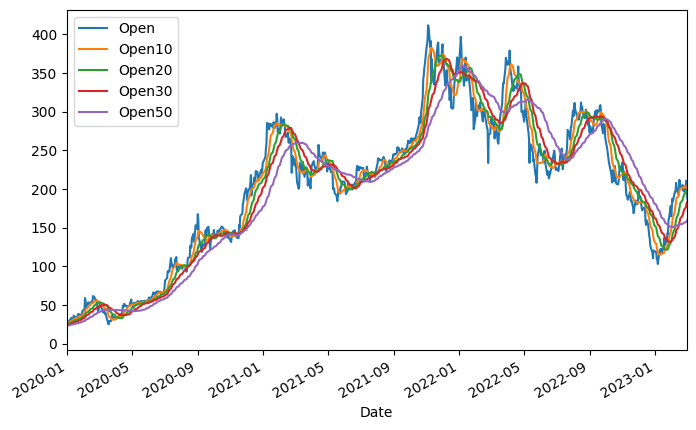

In [136]:
df[['Open','Open10','Open20','Open30','Open50']].plot(xlim=['2020-01-01','2023-03-01'], figsize=(8,5))

# **CUMULATIVE MOVING AVERAGE**

<Axes: xlabel='Date'>

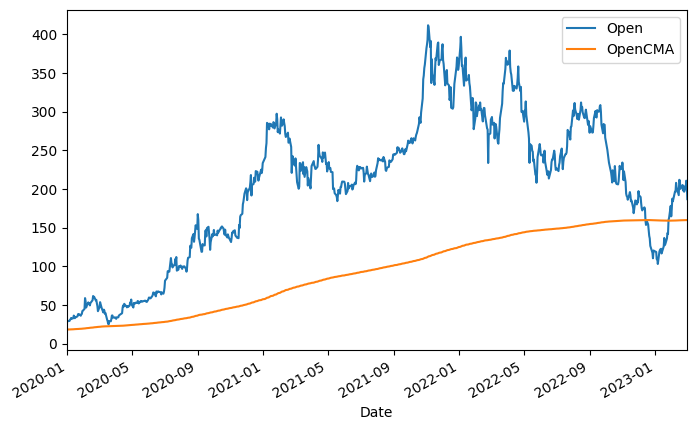

In [137]:
df['OpenCMA']=df['Open'].expanding().mean()
df[['Open','OpenCMA']].plot(xlim=['2020-01-01','2023-03-01'], figsize=(8,5))

# **EXPONENTIAL WEIGHTED MOVING AVERAGE**

In [138]:
df['EWMA_.1'] = df['Open'].ewm(alpha=0.1, adjust=False).mean()
df['EWMA_.3'] = df['Open'].ewm(alpha=0.3, adjust=False).mean()

<Axes: xlabel='Date'>

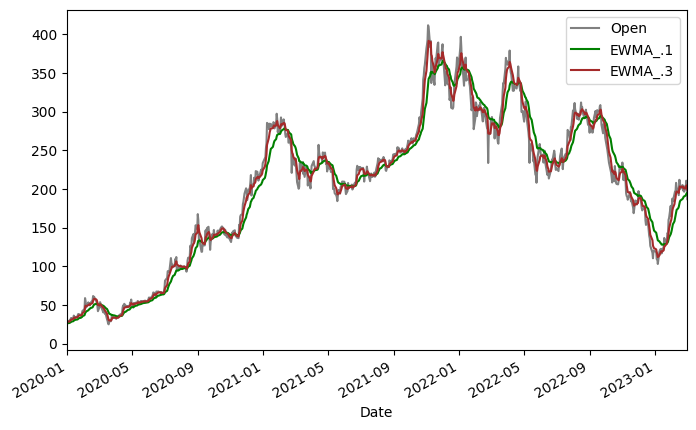

In [139]:
df[['Open','EWMA_.1','EWMA_.3']].plot(xlim=['2020-01-01','2023-03-01'], figsize=(8,5),
                                      color=['gray', 'green', 'brown'])

# **ARIMA & SARIMAX**

In [140]:
import statsmodels.api as sms
df_airline=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Live-Time-Series/main/airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [141]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [142]:
df_airline.dropna(axis=0,inplace=True)

In [143]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [144]:
df_airline.set_index('Month',inplace=True)

In [145]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

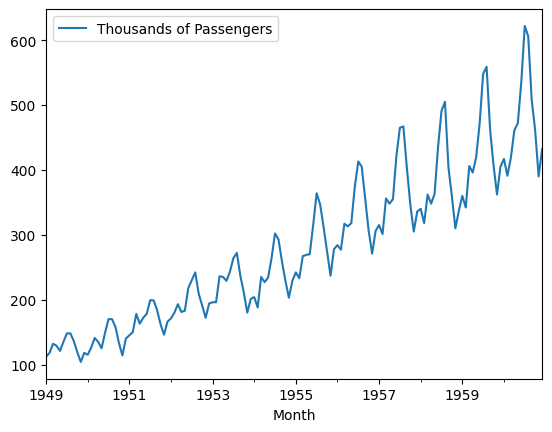

In [146]:
df_airline.plot()

In [147]:
from statsmodels.tsa.stattools import adfuller

In [148]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [149]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060498
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [150]:
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [151]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700047
p- value: 0.05421329028382478
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [152]:
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [153]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468513
p- value: 2.7328918500142026e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [154]:
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [155]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

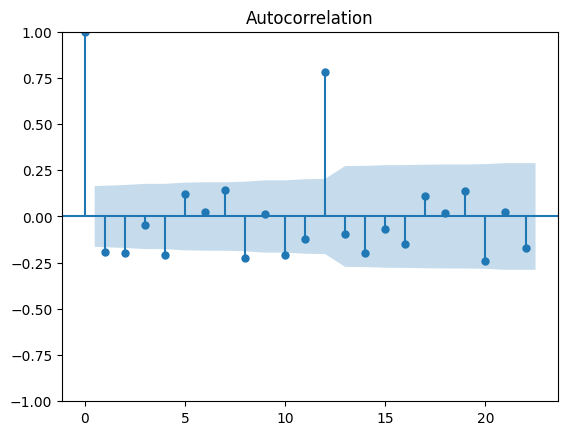

In [156]:
acf=plot_acf(df_airline["Passengers Second Difference"].dropna())

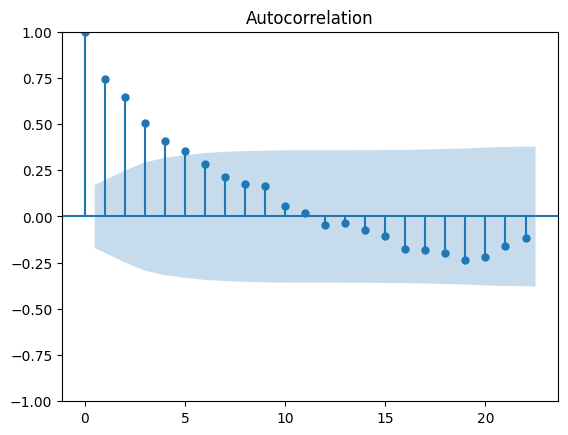

In [157]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())

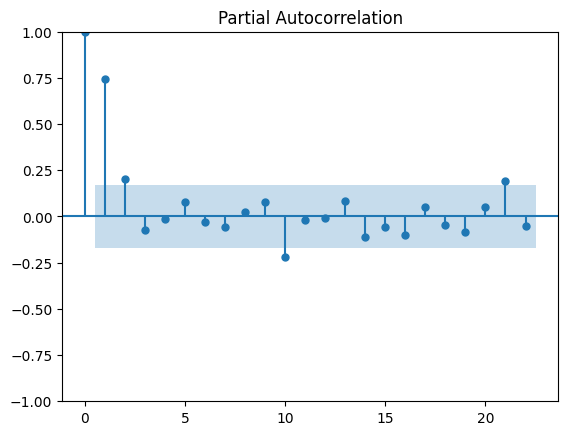

In [158]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())


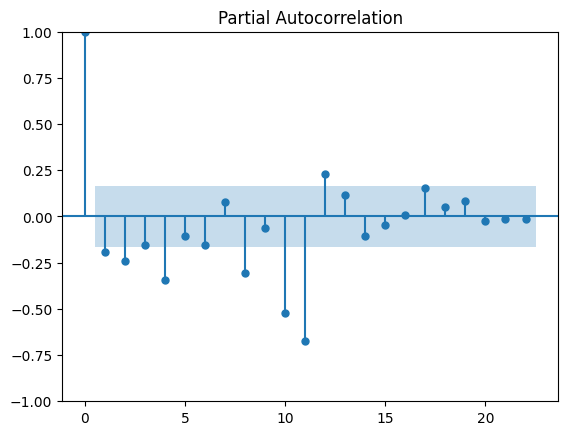

In [159]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

In [160]:
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [161]:
from datetime import datetime, timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [162]:
train_dataset_end

datetime.datetime(1955, 12, 1, 0, 0)

In [163]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [164]:
df_airline[:train_dataset_end].shape

(84, 4)

In [165]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [166]:

from statsmodels.tsa.arima.model import ARIMA

In [167]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'], order=(10,2,5))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [168]:
model_Arima_fit=model_ARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [169]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 5)   Log Likelihood                -310.527
Date:                     Sun, 28 Jul 2024   AIC                            653.054
Time:                             14:41:21   BIC                            691.561
Sample:                         01-01-1949   HQIC                           668.514
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0680      0.115      0.590      0.555      -0.158       0.294
ar.L2         -0.9561      0.094    -10.198      0.000      -1.140      -0.772
ar.L3         -0.0271      0.137     -0.197      0.844      -0.296       0.242
ar.L4         -0.7941      0.112     -7.099      0.000      -1.013      -0.575
ar.L5         -0.1931      0.141     -1.371      0.170      -0.469       0.083
ar.L6         -0.6351      0.115     -5.529      0.000      -0.860      -0.410
ar.L7         -0.2338      0.126     -1.859      0.063      -0.480       0.013
ar.L8         -0.7235      0.124     -5.844      0.000      -0.966      -0.481
ar.L9         -0.1406      0.091     -1.549      0.121      -0.319       0.037
ar.L10        -0.7985      0.075    -10.624      0.000      -0.946      -0.651
ma.L1         -1.2323      0.180     -6.838      0.000      -1.585      -0.879
ma.L2          1.1008      0.256      4.306      0.000       0.600       1.602
ma.L3         -1.1196      0.241     -4.654      0.000      -1.591      -0.648
ma.L4          0.7955      0.304      2.619      0.009       0.200       1.391
ma.L5         -0.3659      0.198     -1.847      0.065      -0.754       0.022
sigma2        94.9871     21.294      4.461      0.000      53.253     136.722
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):                 1.33
Prob(Q):                              0.47   Prob(JB):                         0.51
Heteroskedasticity (H):               1.88   Skew:                             0.30
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [170]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

<Axes: xlabel='Month'>

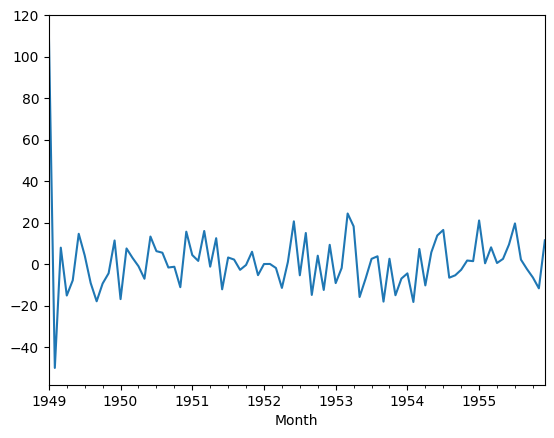

In [172]:
model_Arima_fit.resid.plot()

<Axes: ylabel='Density'>

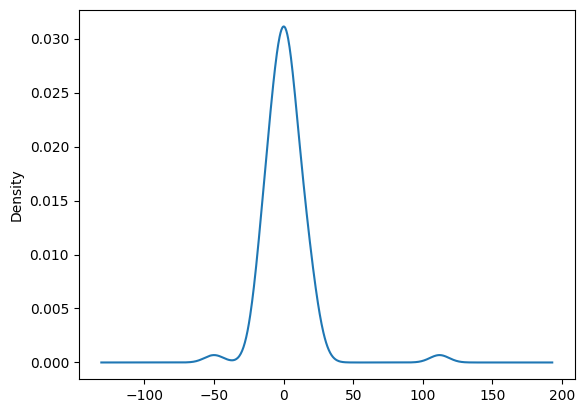

In [173]:
model_Arima_fit.resid.plot(kind='kde')

In [174]:
test_data['Predicted_ARIMA']=pred

<ipython-input-174-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

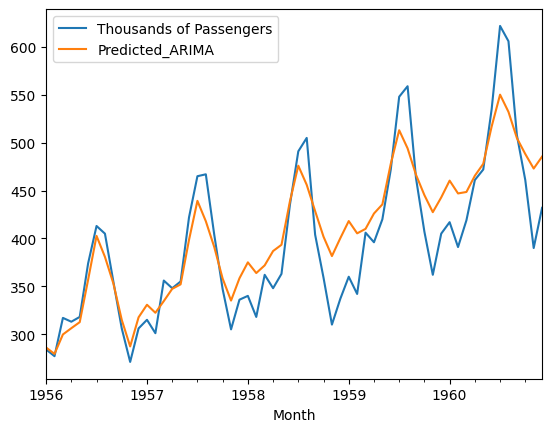

In [175]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

In [178]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [188]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(10,0,5),seasonal_order=(0,1,0,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [189]:
model_SARIMA_fit=model_SARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [190]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(10, 0, 5)x(0, 1, [], 12)   Log Likelihood                -263.006
Date:                              Sun, 28 Jul 2024   AIC                            558.012
Time:                                      14:48:19   BIC                            594.439
Sample:                                  01-01-1949   HQIC                           572.514
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1322      0.582     -0.227      0.820      -1.274       1.009
ar.L2         -0.0058      0.564     -0.010      0.992      -1.110       1.099
ar.L3         -0.4351      0.521     -0.835      0.404      -1.456       0.586
ar.L4          0.0849      0.612      0.139      0.890      -1.114       1.283
ar.L5          0.2653      0.587      0.452      0.651      -0.886       1.417
ar.L6          0.6015      0.605      0.994      0.320      -0.585       1.788
ar.L7          0.1343      0.209      0.642      0.521      -0.276       0.544
ar.L8          0.0836      0.198      0.422      0.673      -0.304       0.471
ar.L9          0.3262      0.223      1.462      0.144      -0.111       0.764
ar.L10        -0.0645      0.236     -0.273      0.785      -0.527       0.398
ma.L1          0.9422      0.741      1.271      0.204      -0.510       2.395
ma.L2          0.8969      0.653      1.372      0.170      -0.384       2.178
ma.L3          1.1357      0.850      1.336      0.182      -0.531       2.802
ma.L4          0.8828      0.788      1.120      0.263      -0.661       2.427
ma.L5          0.6917      0.858      0.806      0.420      -0.990       2.373
sigma2        79.9717     60.523      1.321      0.186     -38.651     198.594
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.43
Prob(Q):                              0.89   Prob(JB):                         0.18
Heteroskedasticity (H):               1.96   Skew:                             0.51
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [191]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: xlabel='Month'>

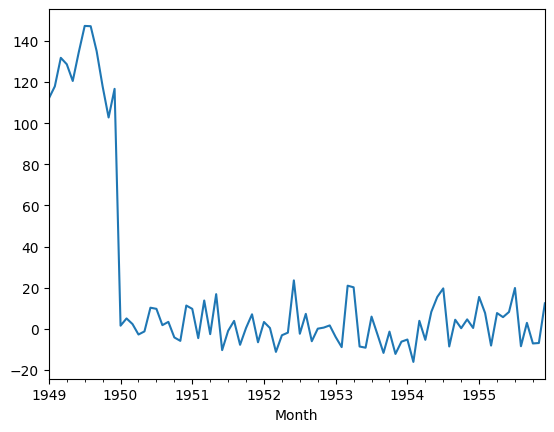

In [192]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

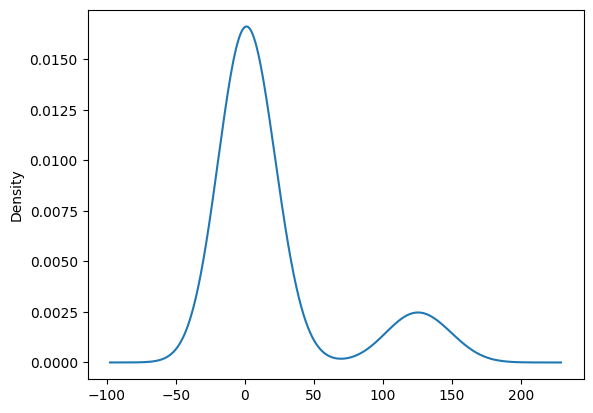

In [193]:
model_SARIMA_fit.resid.plot(kind='kde')

In [194]:
test_data['Predicted_SARIMA']=pred_Sarima

<ipython-input-194-5be0f969ecf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


<Axes: xlabel='Month'>

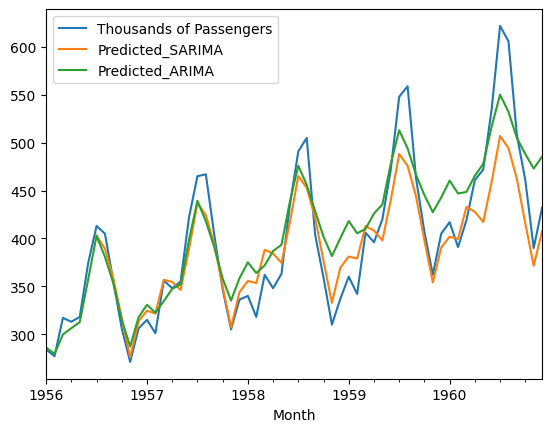

In [195]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()